<a href="https://colab.research.google.com/github/descartesmbogning/phage-therapy-patents-analysis/blob/main/1_temporal_trend_patent_phage_therapy_data_23102023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [ ]:
# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [ ]:
from scipy import stats #the only import you actually need for this
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [ ]:
# function that tests distribution then picks test accordingly
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

In [ ]:
pd.set_option('display.max_columns', None)

## import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import data
data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()


data.head()

,index,#,Jurisdiction,Kind,Display Key,Lens ID,Publication Date,Publication Year,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status
0,0,1,RU,C2,RU 2214829 C2,069-390-611-717-343,2003-10-27,2003,RU 2001129920 A,2001-11-05,RU 2001129920 A,2001-11-05,METHOD FOR TUBERCULOSIS PHAGOTHERAPY,"FIELD: medicine, phthisiology. SUBSTANCE: meth...",NOVOSIB NII T;;UBERKULEZA,KURUNOV JU N;;KURUNOVA N N;;SHATALOVA N D,NaN,https://lens.org/069-390-611-717-343,Granted Patent,no,0,4,1,1,0,NaN,A61K35/76;;A61P31/06,NaN,0,0,NaN,NaN,NaN,EXPIRED
1,1,2,JP,A,JP 2016104011 A,114-759-028-882-736,2016-06-09,2016,JP 2015243657 A,2015-12-14,US 38401510 P,2010-09-17,"ANTIBACTERIAL PHAGES, PHAGE PEPTIDES AND USE M...",PROBLEM TO BE SOLVED: To provide novel bacteri...,TECNIFAR-INDUSTRIA TECNICA FARM S A;;TECHNOPHA...,MIGUEL ANGELO DA COSTA GARCIA;;CARLOS JORGE SO...,NaN,https://lens.org/114-759-028-882-736,Patent Application,no,1,1,48,48,1300,C12N2795/00032;;A61K31/505;;A61K31/7056;;A61K3...,C12N7/00;;A61K35/76;;A61P31/04;;C12N15/09,NaN,0,0,NaN,NaN,NaN,ACTIVE
2,2,3,AU,A1,AU 2015/255318 A1,094-982-928-461-863,2015-12-03,2015,AU 2015/255318 A,2015-11-13,AU 2015/255318 A;;AU 2010/211456 A;;US 2183450...,2009-02-06,"Antibacterial phage, phage peptides and method...",The present invention is directed to the field...,TECNIFAR INDÚSTRIA TÉCNICA FARMACÉUTICA S A;;T...,DA COSTA GARCIA MIGUEL ÂNGELO;;SOUSA DE SÃO JO...,"TECHNOPHAGE, INVESTIGACAO E DESENVOLVIMENTO EM...",https://lens.org/094-982-928-461-863,Patent Application,no,0,0,3,45,0,NaN,A61K35/76;;C12N9/14;;G01N33/569,NaN,0,0,NaN,NaN,NaN,ACTIVE
3,3,4,US,A1,US 2016/0022747 A1,167-908-891-122-112,2016-01-28,2016,US 201514852112 A,2015-09-11,US 201514852112 A;;US 201113148009 A;;PT 20100...,2009-02-06,"Antibacterial Phage, Phage Peptides and Method...",The present invention is directed to the field...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,DA COSTA GARCIA MIGUEL ANGELO;;SOUSA DE SAO JO...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,https://lens.org/167-908-891-122-112,Patent Application,yes,0,1,42,45,816,A61K38/00;;A61K45/06;;C07K14/005;;C12N7/00;;C1...,A61K35/76;;A61K9/00;;C12N7/00,NaN,0,0,NaN,NaN,NaN,ACTIVE
4,4,5,AU,A1,AU 2017/204331 A1,112-018-476-081-94X,2017-07-13,2017,AU 2017/204331 A,2017-06-26,AU 2017/204331 A;;AU 2015/255313 A;;AU 2011/30...,2011-09-19,"Antibacterial phage, phage peptides and method...",The present invention is directed to the field...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,DA COSTA GARCIA MIGUEL ANGELO;;SOUSA DE SAO JO...,NaN,https://lens.org/112-018-476-081-94X,Patent Application,no,0,3,1,1,0,Y02A50/30,A61K35/76;;C12N7/00,NaN,0,0,NaN,NaN,NaN,DISCONTINUED


In [ ]:
# Check the number of patents
num_patents = data.shape[0]
print(f"Number of Patents: {num_patents}")


Number of Patents: 2365


In [ ]:
#data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        2365 non-null   int64 
 1   #                            2365 non-null   int64 
 2   Jurisdiction                 2365 non-null   object
 3   Kind                         2365 non-null   object
 4   Display Key                  2365 non-null   object
 5   Lens ID                      2365 non-null   object
 6   Publication Date             2365 non-null   object
 7   Publication Year             2365 non-null   int64 
 8   Application Number           2365 non-null   object
 9   Application Date             2365 non-null   object
 10  Priority Numbers             2363 non-null   object
 11  Earliest Priority Date       2363 non-null   object
 12  Title                        2365 non-null   object
 13  Abstract                     2348

In [ ]:
data['Application Date'] = pd.to_datetime(data['Application Date'])
data['Earliest Priority Date'] = pd.to_datetime(data['Earliest Priority Date'])

In [ ]:
data['Application Year'] = data['Application Date'].dt.year
data['Earliest Priority Year'] = data['Earliest Priority Date'].dt.year

In [ ]:
# Convert 'Application Year' to integers
data['Publication Year'] = data['Publication Year'].astype('Int64')
data['Application Year'] = data['Application Year'].astype('Int64')
data['Earliest Priority Year'] = data['Earliest Priority Year'].astype('Int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        2365 non-null   int64         
 1   #                            2365 non-null   int64         
 2   Jurisdiction                 2365 non-null   object        
 3   Kind                         2365 non-null   object        
 4   Display Key                  2365 non-null   object        
 5   Lens ID                      2365 non-null   object        
 6   Publication Date             2365 non-null   object        
 7   Publication Year             2365 non-null   Int64         
 8   Application Number           2365 non-null   object        
 9   Application Date             2365 non-null   datetime64[ns]
 10  Priority Numbers             2363 non-null   object        
 11  Earliest Priority Date       2363 non-null 

# Patent trends

In [ ]:
data['Publication Year'].count()

2365

In [ ]:
data['Application Year'].count()

2365

In [ ]:
data['Earliest Priority Year'].count()

2363

In [ ]:
count_year_1 = data['Application Year'].value_counts().rename('Application')
count_year_2 = data['Earliest Priority Year'].value_counts().rename('Earliest Priority')
count_year_3 = data['Publication Year'].value_counts().rename('Publication')

data_trend = pd.concat([count_year_1, count_year_2, count_year_3], axis=1).fillna(0).astype(int).reset_index().rename(columns={'index': 'Year'})
data_trend

,Year,Application,Earliest Priority,Publication
0,2021,206,193,228
1,2020,180,187,177
2,2022,175,129,195
3,2019,165,155,166
4,2017,164,159,105
...,...,...,...,...
60,1974,0,0,3
61,1960,0,0,1
62,1975,0,0,1
63,1970,0,0,1


In [ ]:
data_trend.head(60)

,Year,Application,Earliest Priority,Publication
0,2021,206,193,228
1,2020,180,187,177
2,2022,175,129,195
3,2019,165,155,166
4,2017,164,159,105
5,2018,124,120,164
6,2016,114,131,92
7,2015,106,100,87
8,2012,74,75,70
9,2014,74,77,72


In [ ]:
data_trend[['Year','Application']].head(60)

,Year,Application
0,2021,206
1,2020,180
2,2022,175
3,2019,165
4,2017,164
5,2018,124
6,2016,114
7,2015,106
8,2012,74
9,2014,74


In [ ]:
import textwrap

def wrap_text(text, width=20):
    """Wrap text to the specified width."""
    lines = textwrap.wrap(text, width=width)
    return '\n'.join(lines)
wrap_text('1st phage genome seqenced')

'1st phage genome\nseqenced'

In [ ]:
# Define the text you want to modify
text = 'This is a long text that needs to be modified.'

# Wrap the text using the wrap_text() function
wrapped_text = wrap_text(text, width=10)

# Print the modified text
print(wrapped_text)


This is a
long text
that needs
to be
modified.


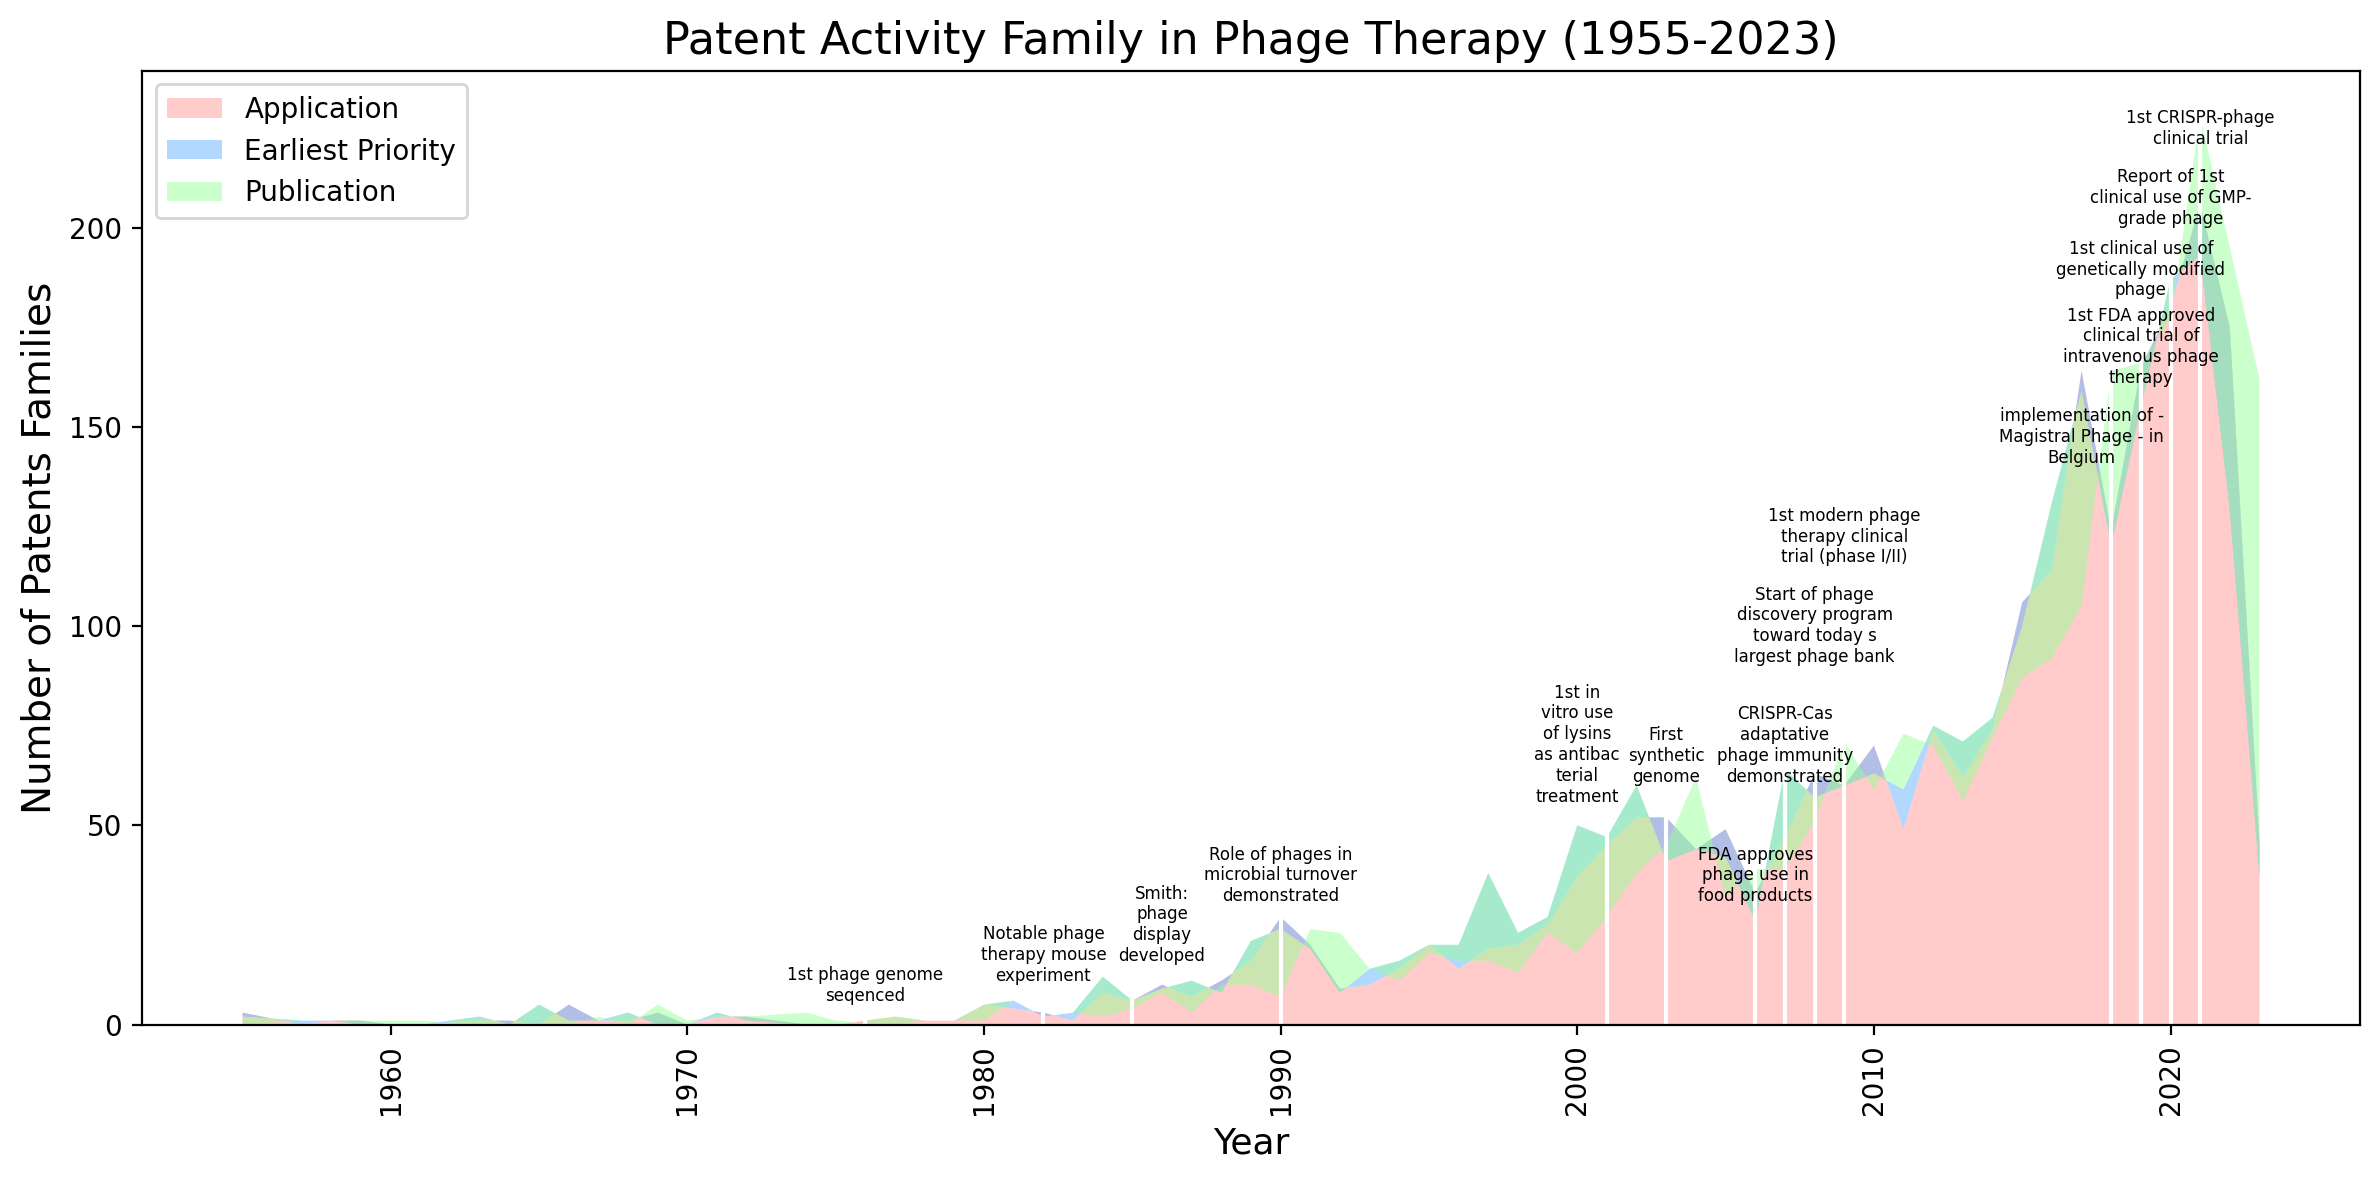

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file called 'patent_data.csv'
#data = pd.read_csv('patent_data.csv')

# Rename your columns for easier access
data_trend.columns = ['Year', 'Application', 'Earliest_Priority', 'Publication']

# Sort data by Year for proper plotting
data_trend2 = data_trend.sort_values('Year')

# Define the x (Year) and y (patent counts) values
x = data_trend2['Year'].astype(float).values

# Create new columns for the adjusted values
data_trend2['Adjusted_Earliest_Priority'] = data_trend2['Earliest_Priority'] - data_trend2['Application']
data_trend2['Adjusted_Publication'] = data_trend2['Publication'] - data_trend2['Earliest_Priority']

y = data_trend2[['Application', 'Adjusted_Earliest_Priority', 'Adjusted_Publication']]

# Create the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(x, y.T, labels=['Application', 'Earliest Priority', 'Publication'],
              alpha=0.5, colors=['#ff9999','#66b3ff','#99ff99'])

# Add title and labels
plt.title('Patent Activity Family in Phage Therapy (1955-2023)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Patents Families', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=1976, color='white')
# Add a label to the line
plt.text(1976, 5, wrap_text('1st phage genome seqenced'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1982, color='white')
# Add a label to the line
plt.text(1982, 10, wrap_text('Notable phage therapy mouse experiment'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2001, color='white')
# Add a label to the line
plt.text(2000, 55, wrap_text('1st in vitro use of lysins as antibacterial treatment', width=10), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2006, color='white')
# Add a label to the line
plt.text(2006, 30, wrap_text('FDA approves phage use in food products', width=15), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2008, color='white')
# Add a label to the line
plt.text(2008, 90, wrap_text('Start of phage discovery program toward today s largest phage bank'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2009, color='white')
# Add a label to the line
plt.text(2009, 115, wrap_text('1st modern phage therapy clinical trial (phase I/II)'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2018, color='white')
# Add a label to the line
plt.text(2017, 140, wrap_text('implementation of - Magistral Phage - in Belgium'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2019, color='white')
# Add a label to the line
plt.text(2019, 160, wrap_text('1st FDA approved clinical trial of intravenous phage therapy'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2019, color='white')
# Add a label to the line
plt.text(2019, 182, wrap_text('1st clinical use of genetically modified phage'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2020, color='white')
# Add a label to the line
plt.text(2020, 200, wrap_text('Report of 1st clinical use of GMP-grade phage'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2021, color='white')
# Add a label to the line
plt.text(2021, 220, wrap_text('1st CRISPR-phage clinical trial'), rotation=360, ha='center', va='bottom', fontsize=6)

# https://www.nature.com/articles/nrmicro3564
# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1985, color='white')
# Add a label to the line
plt.text(1986, 15, wrap_text('Smith: phage display developed', width=10 ), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1990, color='white')
# Add a label to the line
plt.text(1990, 30, wrap_text('Role of phages in microbial turnover demonstrated'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2003, color='white')
# Add a label to the line
plt.text(2003, 60, wrap_text('First synthetic genome', width=10 ), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2007, color='white')
# Add a label to the line
plt.text(2007, 60, wrap_text('CRISPR-Cas adaptative phage immunity demonstrated', width=15), rotation=360, ha='center', va='bottom', fontsize=6)

# Display the plot
#plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


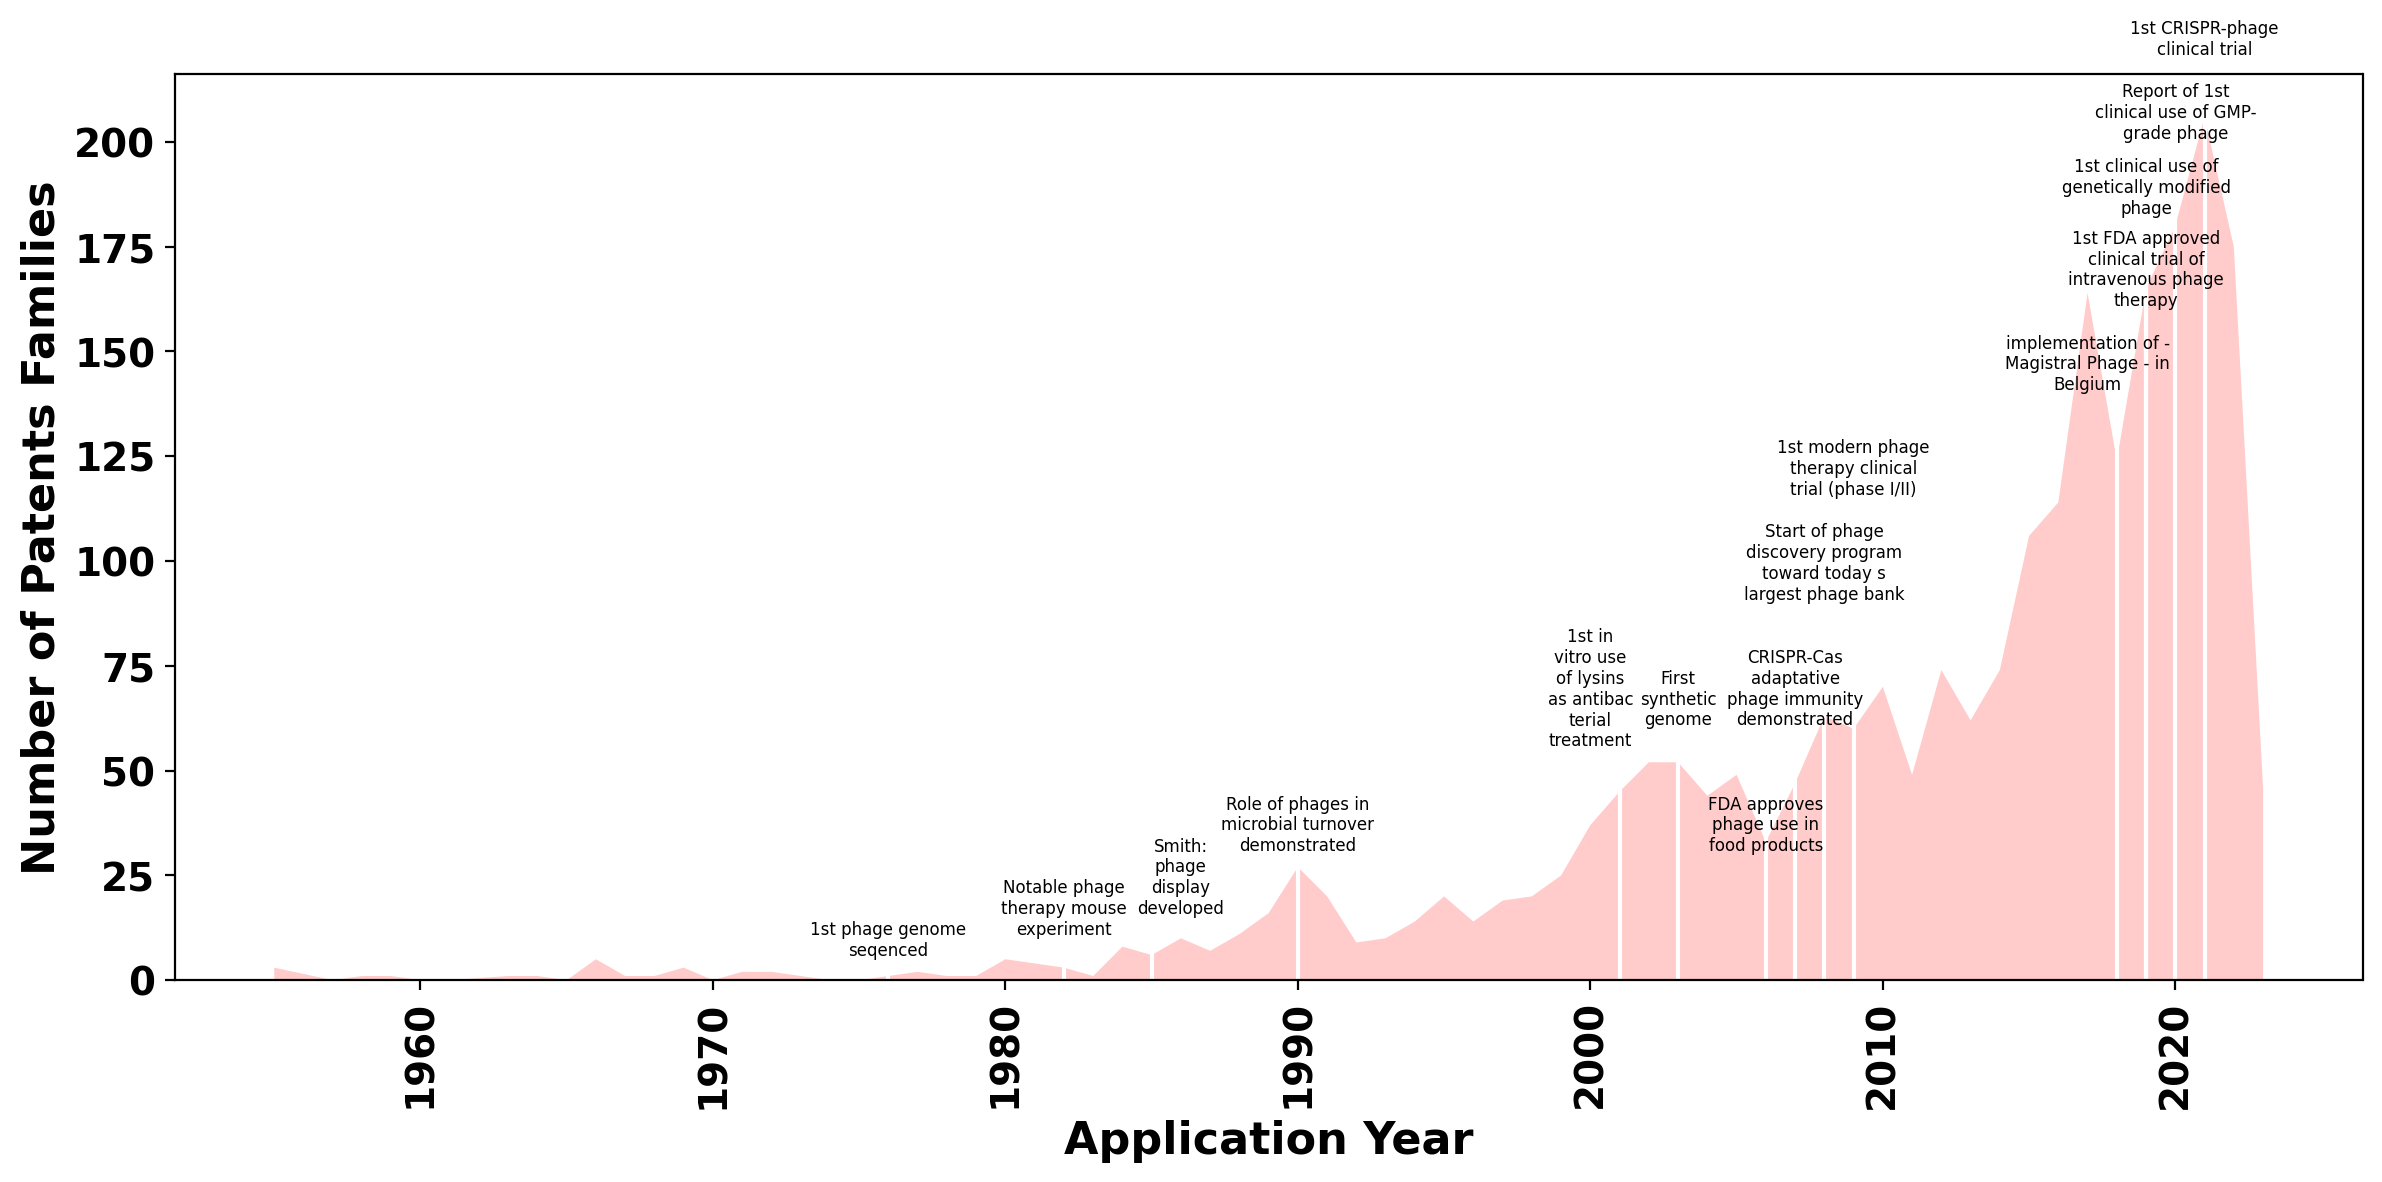

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file called 'patent_data.csv'
#data = pd.read_csv('patent_data.csv')

# Rename your columns for easier access
data_trend.columns = ['Year', 'Application', 'Earliest_Priority', 'Publication']

# Sort data by Year for proper plotting
data_trend2 = data_trend.sort_values('Year')

# Define the x (Year) and y (patent counts) values
x = data_trend2['Year'].astype(float).values

# Create new columns for the adjusted values
#data_trend2['Adjusted_Earliest_Priority'] = data_trend2['Earliest_Priority'] - data_trend2['Application']
#data_trend2['Adjusted_Publication'] = data_trend2['Publication'] - data_trend2['Earliest_Priority']

y = data_trend2[['Application']]

# Create the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(x, y.T, #fontweight='bold', #labels=['Application'],
              alpha=0.5, colors=['#ff9999'])
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Add title and labels
#plt.title('Patent Activity Family in Phage Therapy (1955-2023)', fontsize=18, fontweight='bold')
plt.xlabel('Application Year', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patents Families', fontsize=16, fontweight='bold')

# Add legend
#plt.legend(loc='upper left')

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=1976, color='white')
# Add a label to the line
plt.text(1976, 5, wrap_text('1st phage genome seqenced'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1982, color='white')
# Add a label to the line
plt.text(1982, 10, wrap_text('Notable phage therapy mouse experiment'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2001, color='white')
# Add a label to the line
plt.text(2000, 55, wrap_text('1st in vitro use of lysins as antibacterial treatment', width=10), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2006, color='white')
# Add a label to the line
plt.text(2006, 30, wrap_text('FDA approves phage use in food products', width=15), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2008, color='white')
# Add a label to the line
plt.text(2008, 90, wrap_text('Start of phage discovery program toward today s largest phage bank'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2009, color='white')
# Add a label to the line
plt.text(2009, 115, wrap_text('1st modern phage therapy clinical trial (phase I/II)'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2018, color='white')
# Add a label to the line
plt.text(2017, 140, wrap_text('implementation of - Magistral Phage - in Belgium'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2019, color='white')
# Add a label to the line
plt.text(2019, 160, wrap_text('1st FDA approved clinical trial of intravenous phage therapy'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2019, color='white')
# Add a label to the line
plt.text(2019, 182, wrap_text('1st clinical use of genetically modified phage'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2020, color='white')
# Add a label to the line
plt.text(2020, 200, wrap_text('Report of 1st clinical use of GMP-grade phage'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2021, color='white')
# Add a label to the line
plt.text(2021, 220, wrap_text('1st CRISPR-phage clinical trial'), rotation=360, ha='center', va='bottom', fontsize=6)

# https://www.nature.com/articles/nrmicro3564
# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1985, color='white')
# Add a label to the line
plt.text(1986, 15, wrap_text('Smith: phage display developed', width=10 ), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1990, color='white')
# Add a label to the line
plt.text(1990, 30, wrap_text('Role of phages in microbial turnover demonstrated'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2003, color='white')
# Add a label to the line
plt.text(2003, 60, wrap_text('First synthetic genome', width=10 ), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2007, color='white')
# Add a label to the line
plt.text(2007, 60, wrap_text('CRISPR-Cas adaptative phage immunity demonstrated', width=15), rotation=360, ha='center', va='bottom', fontsize=6)

# Display the plot
#plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


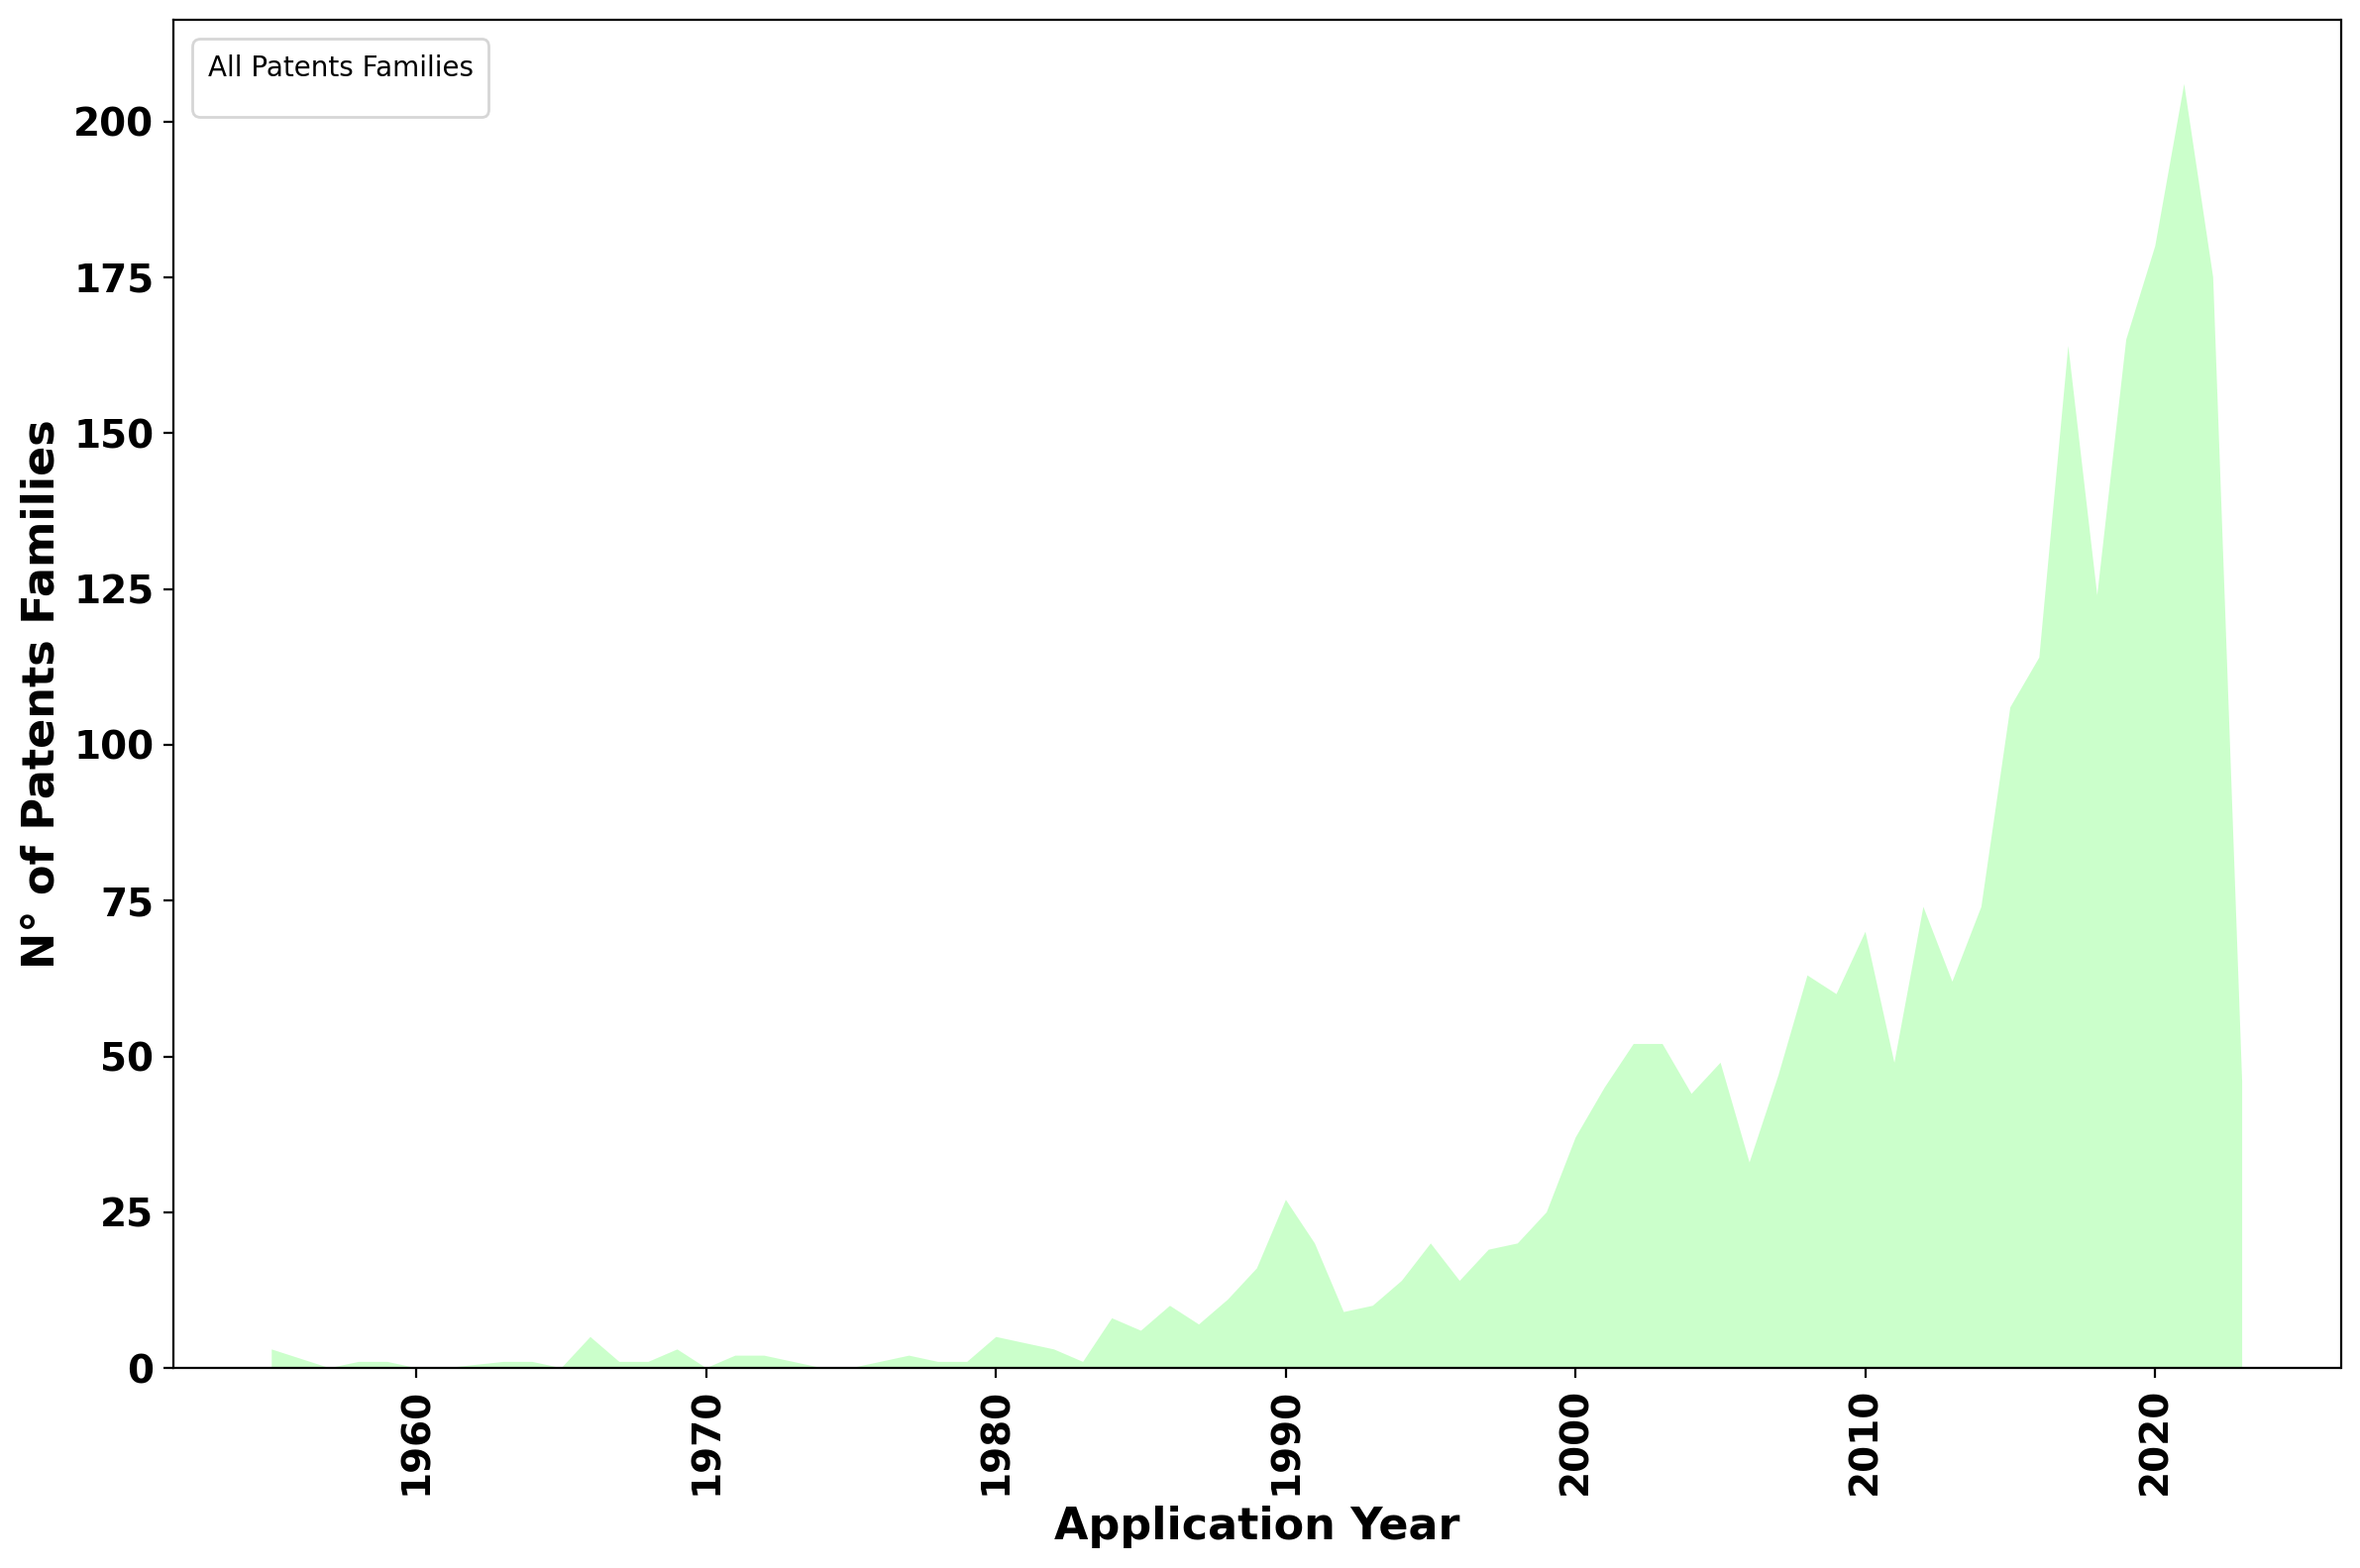

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file called 'patent_data.csv'
#data = pd.read_csv('patent_data.csv')

# Rename your columns for easier access
data_trend.columns = ['Year', 'Application', 'Earliest_Priority', 'Publication']

# Sort data by Year for proper plotting
data_trend2 = data_trend.sort_values('Year')

# Define the x (Year) and y (patent counts) values
x = data_trend2['Year'].astype(float).values

# Create new columns for the adjusted values
#data_trend2['Adjusted_Earliest_Priority'] = data_trend2['Earliest_Priority'] - data_trend2['Application']
#data_trend2['Adjusted_Publication'] = data_trend2['Publication'] - data_trend2['Earliest_Priority']

y = data_trend2[['Application']]

# Create the stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(x, y.T, #fontweight='bold', #labels=['Application'],
              alpha=0.5, colors=['#99ff99'])
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Add title and labels
#plt.title('Trend in Phage Therapy Applications (1955-2023)', fontsize=18, fontweight='bold')
plt.legend(title='All Patents Families',loc='upper left', fontsize=14)
plt.xlabel('Application Year', fontsize=16, fontweight='bold')
plt.ylabel('N° of Patents Families', fontsize=16, fontweight='bold')




# Display the plot
#plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()
